In [38]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats 

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# Custom Imports
import wrangle
from env import get_db_url

# Regression Project: Zillow Property Values

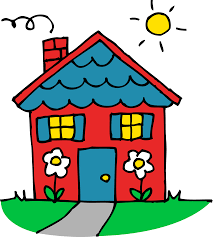

# Project Objectives: 


We are wanting to gather data to create a new model to predict property values. We have one currently that we would like to improve upon and use our data as a tool to help us find trends that can help our predictions. At Zillow, this data is important because our customers need to be able to trust that we can give them accurate predictions for value.

- Construct a Regression model that can properly predict the estimated property value of Single Family Properties .

- Present a report to team that shows my processes and how I came to my conclusions.

- Make recommendations on what are attributes to consider when predicting property value.

# Project Goals:

As a Junior Data Scientist, my goals are to use the data I have to create a ML Regression model that beats our current model on predicting property value. I want to be able to zero in on potential factors that I find correlate most to predicting these values, as it is very important to our company to be trustworthy with the information we provide our customers. 

# Wrangle The Data

## Step 1: Acquire

<b> Data was acquired from Zillow database in MySQL Workbench. </b>

In [39]:
df = wrangle.get_new_zillow_data()
# Acquire unedited db

In this step, I used SQL queries to pull what I wanted from Zillows tables. 

I went with pulling bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, regionidzip as zipcode, fips from properties 2017 table. 

I renamed regionidzip to zipcode right away for readability. I then joined propertylandusetype and predictions_2017 to get all the data I wanted in one place.

## Step 2: Prepare

In this step, I created multiple functions that were meant to help me prepare my data for both exploration and modeling.


Functions created:

<b><font color='green'> train_validate_test_split </font></b> : This function splits the data into the 3 sets needed for exploring and statistical tests.
<b><font color='green'> scale_split_data </font></b> : This function scales the the 3 split data sets. 

<b><font color='green'> wrangle_zillow </font></b> : This function has the acquire function nested inside of it, but also starts to sort through the data. This function is also only intended to be used during my exploration phase, as it is not scaled or split yet.

Steps implemented: 
  - Dropped all nulls by row (The amount of data loss that happens here is less than 1%, it is worth it)
  - Converted columns to integers (fips, yearbuilt, bedroomcnt, taxvalluedollarcnt, calculatedfinishedsquarefeet)
  - Renamed calculatedsquarefeet to something easier and smaller = square_feet
  - I decided to narrow down my search and get rid of outliers by adding in criteria

          -> Square feet was narrowed down to between 400 and 100,00
      
          -> Taxvalluedollarcount narrowed to 10,000 - 2,000,000
      
          -> Taxamount to 300 - 300,000
      
          -> Bathroom and bedroom count to 7 or less
      
          -> Made sure that any values that were either null or 0 for bedroom/bathroom to be taken out.
      
  - Converted fips to fips_name and named the zip codes (6037, 'Los Angeles', 6059, 'Orange','Ventura')

### The Big One...

<b><font color='green'> wrangle_split_scale </font></b> : This function is meant to take all prior functions and put them all in one. It wrangles, splits and scales the data meant to be used for modeling.


# Explore

## The Big Question: How do we determine home value?

Our target variable is taxvalluedollarcnt, so we will be comparing the other columns to this to determine our goal.

## Initial Hypothesis : 
- County (fips_name) is associated with property value.
- Square feet (calculatedsquarefeet) is associated with property value.
- Homes with more beds are associated with a higher property value.
- Homes with more baths are associated with a higher propery value.
- Year built is associated with property value.

In [40]:
# First, lets call what we need.
df = wrangle.wrangle_zillow()
train, validate, test = wrangle.train_validate_test_split(df)

#### For my visuals, I will be splitting them into the 3 counties to break down my analysis further to help expand on the county relevancy for property values.

# Question: Is square feet associated with property value?

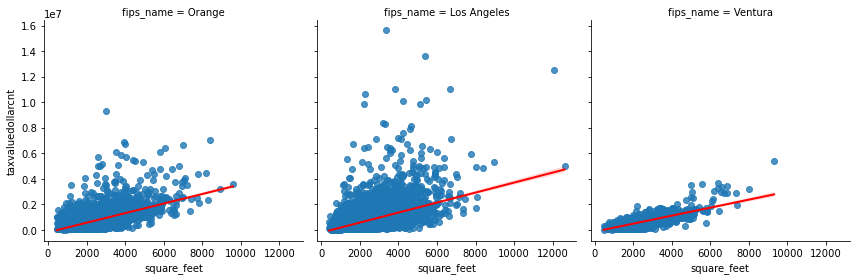

In [41]:
# Lmplot using square_feet and tax value
sns.lmplot(x = 'square_feet', y = 'taxvaluedollarcnt', data = train, line_kws={'color': 'red', 'linewidth': 2}, height = 4, col = 'fips_name')

Hypothesis:
    
H0 = There is no relationship between square feet and property value.

H1 = There is a relationship between square feet and property value.

In [42]:
# Setting alpha to standard
alpha = .05

In [43]:
# Decided to run a pearsons test to see if our values will prove a relationship.
corr, p = stats.pearsonr(train.square_feet, train.taxvaluedollarcnt) 

if p < alpha:
    print('\nP is less than alpha. We reject the null hypothesis.')


P is less than alpha. We reject the null hypothesis.


#### Therefore, square feet has a relationship with property value.

# Question: Is the amount of bedrooms associated with property value?

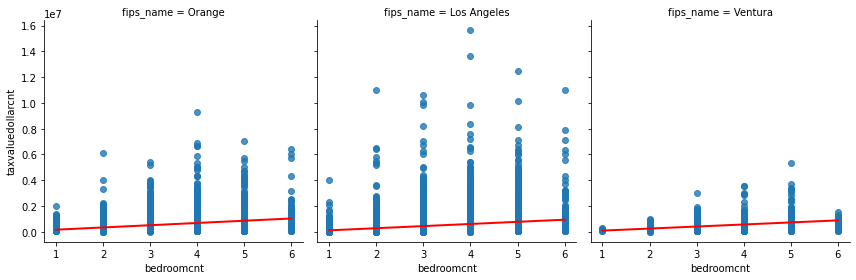

In [44]:
# Lmplot using bedrooms and tax value
sns.lmplot(x = 'bedroomcnt', y = 'taxvaluedollarcnt', data = train, line_kws={'color': 'red', 'linewidth': 2}, height = 4, col = 'fips_name')

Hypothesis:
    
H0 = There is no relationship between bedrooms and property value.

H1 = There is a relationship between bedrooms and property value.

In [45]:
# Pearsons test to see if our values will prove a relationship.
corr, p = stats.pearsonr(train.bedroomcnt, train.taxvaluedollarcnt) 

if p < alpha:
    print('\nP is less than alpha. We reject the null hypothesis.')


P is less than alpha. We reject the null hypothesis.


#### Therefore, bedroom count is related to higher property value.

# Question: Is the amount of bathrooms associated with property value?

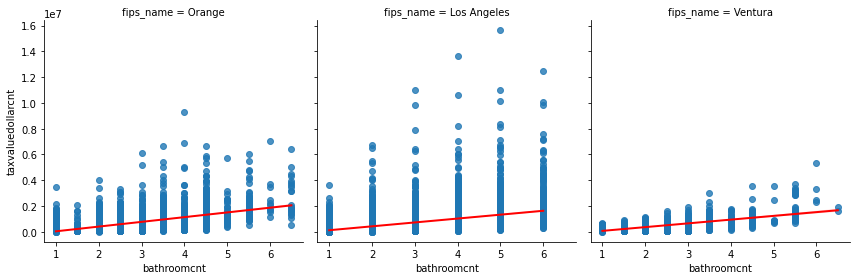

In [46]:
# Lmplot using bathrooms and tax value
sns.lmplot(x = 'bathroomcnt', y = 'taxvaluedollarcnt', data = train, line_kws={'color': 'red', 'linewidth': 2}, height = 4, col = 'fips_name')

Hypothesis:
    
H0 = There is no relationship between bathrooms and property value.

H1 = There is a relationship between bathrooms and property value.

In [47]:
# Pearsons test to see if our values will prove a relationship.
corr, p = stats.pearsonr(train.bathroomcnt, train.taxvaluedollarcnt) 

if p < alpha:
    print('\nP is less than alpha. We reject the null hypothesis.')


P is less than alpha. We reject the null hypothesis.


#### Therefore, the number of bathrooms is related to higher property value.

# Question: Is the year built associated with property value?

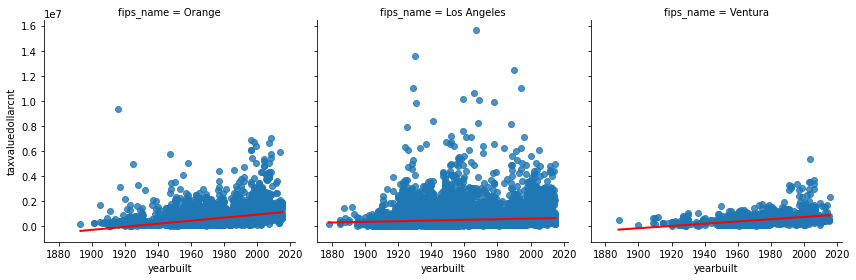

In [48]:
# Lmplot using yearbuilt and tax value
sns.lmplot(x = 'yearbuilt', y = 'taxvaluedollarcnt', data = train, line_kws={'color': 'red', 'linewidth': 2}, height = 4, col = 'fips_name')

Hypothesis:
    
H0 = There is no relationship between year built and property value.

H1 = There is a relationship between year built and property value.

In [49]:
# Pearsons test to see if our values will prove a relationship.
corr, p = stats.pearsonr(train.yearbuilt, train.taxvaluedollarcnt) 

if p < alpha:
    print('\nP is less than alpha. We reject the null hypothesis.')


P is less than alpha. We reject the null hypothesis.


#### Therefore, the year built is assocaited with property value.

## Exploration summary:

Exploration using visuals and statistical tests prove that all variables are associated with higher property values. We will move forward with our modeling using square_feet, year_built, bedroomcnt, and bathroomcnt.

# Modeling

In [50]:
# Time to bring in my function for modeling
train_scaled, validate_scaled, test_scaled = wrangle.wrangle_split_scale()

In [51]:
# Create the object
# Since taxamount and taxvalue amount are so similar I don't want to move forward with 
# it in my model.
x_train = train_scaled.drop(columns = ['taxvaluedollarcnt', 'taxamount', 'fips_name'])
y_train = pd.DataFrame(train_scaled[['taxvaluedollarcnt']])

x_validate = validate_scaled.drop(columns = ['taxvaluedollarcnt', 'taxamount','fips_name'])
y_validate = pd.DataFrame(validate_scaled[['taxvaluedollarcnt']])

x_test = train_scaled.drop(columns = ['taxvaluedollarcnt', 'taxamount', 'fips_name'])
y_train = pd.DataFrame(train_scaled[['taxvaluedollarcnt']])

## Setting Up The Baseline

For Regression, we want to decide if we need to use mean or median baseline, so lets look at both

In [52]:
#Create mean baseline model
y_train['baseline_mean_pred'] = y_train['taxvaluedollarcnt'].mean()
y_validate['baseline_mean_pred'] = y_validate['taxvaluedollarcnt'].mean()

#Create median baseline model
y_train['baseline_median_pred'] = y_train['taxvaluedollarcnt'].median()
y_validate['baseline_median_pred'] = y_validate['taxvaluedollarcnt'].median()

#### Lets look at what we need to beat. 

In [53]:
#determine RSMSE
results = []

baseline_mean = {
    'model':'baseline_mean',
    'RMSE_train': mean_squared_error(y_train['taxvaluedollarcnt'], y_train['baseline_mean_pred'])**(0.5),
    'RMSE_validate': mean_squared_error(y_validate['taxvaluedollarcnt'], y_validate['baseline_mean_pred'])**(0.5)

}
baseline_median = {
    'model':'baseline_median',
    'RMSE_train': mean_squared_error(y_train['taxvaluedollarcnt'], y_train['baseline_median_pred'])**(0.5),
    'RMSE_validate': mean_squared_error(y_validate['taxvaluedollarcnt'], y_validate['baseline_median_pred'])**(0.5)

}
results.append(baseline_mean)
results.append(baseline_median)

pd.DataFrame(results)

,model,RMSE_train,RMSE_validate
0,baseline_mean,596704.058777,621286.160927
1,baseline_median,612533.700708,636062.789038


### Onwards to modeling our train and validate..

## Linear Regression

In [54]:
# Create the model
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train['taxvaluedollarcnt'])
y_train['lr_train_pred'] = lr.predict(x_train)
y_validate['lr_validate_pred'] = lr.predict(x_validate)
# Calculate RMSE and compare
lr_rmse = {
    'model':'linear regression',
    'RMSE_train': mean_squared_error(y_train['taxvaluedollarcnt'], y_train['lr_train_pred'])**(0.5),
    'RMSE_validate': mean_squared_error(y_validate['taxvaluedollarcnt'], y_validate['lr_validate_pred'])**(0.5)

}
results.append(lr_rmse)
pd.DataFrame(results)

,model,RMSE_train,RMSE_validate
0,baseline_mean,596704.058777,621286.160927
1,baseline_median,612533.700708,636062.789038
2,linear regression,472279.858426,489895.075498


#### Linnear Regression model beats both baselines.

## LassoLars

In [55]:
# Create model
lars = LassoLars(alpha=1.0)
lars.fit(x_train, y_train['taxvaluedollarcnt'])
y_train['lars_train_pred'] = lars.predict(x_train)
y_validate['lars_validate_pred'] = lars.predict(x_validate)
# Calculate RMSE to compare
lars_rmse = {
    'model':'LassoLars regression',
    'RMSE_train': mean_squared_error(y_train['taxvaluedollarcnt'], y_train['lars_train_pred'])**(0.5),
    'RMSE_validate': mean_squared_error(y_validate['taxvaluedollarcnt'], y_validate['lars_validate_pred'])**(0.5)

}
results.append(lars_rmse)
pd.DataFrame(results)

,model,RMSE_train,RMSE_validate
0,baseline_mean,596704.058777,621286.160927
1,baseline_median,612533.700708,636062.789038
2,linear regression,472279.858426,489895.075498
3,LassoLars regression,472280.261697,489907.106506


#### LassoLars beats both baselines and is extremely close to Linnear Regression model.

## Polynomial Regression

In [56]:
#Polynomial Features
pr = PolynomialFeatures(degree=2)
x_train_degree2 = pr.fit_transform(x_train)
x_validate_degree2 = pr.transform(x_validate)
# create the model object
lr2 = LinearRegression(normalize=True)
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series
lr2.fit(x_train_degree2, y_train['taxvaluedollarcnt'])
y_train['poly_train_pred'] = lr2.predict(x_train_degree2)
y_validate['poly_validate_pred'] = lr2.predict(x_validate_degree2)
# Calculate RMSE to compare 
poly_rmse = {
    'model':'Polynomial regression',
    'RMSE_train': mean_squared_error(y_train['taxvaluedollarcnt'], y_train['poly_train_pred'])**(0.5),
    'RMSE_validate': mean_squared_error(y_validate['taxvaluedollarcnt'], y_validate['poly_validate_pred'])**(0.5)

}
results.append(poly_rmse)
pd.DataFrame(results)

,model,RMSE_train,RMSE_validate
0,baseline_mean,596704.058777,621286.160927
1,baseline_median,612533.700708,636062.789038
2,linear regression,472279.858426,489895.075498
3,LassoLars regression,472280.261697,489907.106506
4,Polynomial regression,450764.891992,469818.556121


#### The Polynomial Regression model not only beats the baselines, but beats the LassoLars and Linear as well. Polynomial is our best peforming model and will be moved into our test phase.

# Our Best Model - Polynomial Regression

## Test Model

In [ ]:
# Polynomial features 
pr = PolynomialFeatures(degree=2)
x_test_degree2 = pr.fit_transform(x_test)
# create the model object
lr2 = LinearRegression(normalize=True)
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lr2.fit(x_test_degree2, y_test['taxvaluedollarcnt'])
# predict test
y_test['poly_train_pred'] = lr2.predict(x_test_degree2)
# Calculate RMSE to compare
poly_rmse = {
    'model':'Polynomial regression',
    'RMSE_': mean_squared_error(y_train['taxvaluedollarcnt'], y_train['poly_train_pred'])**(0.5),
    'RMSE_validate': mean_squared_error(y_validate['taxvaluedollarcnt'], y_validate['poly_validate_pred'])**(0.5)

}
results.append(poly_rmse)
pd.DataFrame(results)